In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize, basinhopping

# 1️⃣ Load your dataset
df = pd.read_csv(r"C:\work\Flam_R-D\xy_data.csv")
x_data = df['x'].values
y_data = df['y'].values
N = len(x_data)

In [2]:
# 2️⃣ Define your model function
def parametric_curve(t, theta, M, X):
    """Parametric curve generating (x, y) points for given parameters."""
    theta_rad = np.deg2rad(theta)
    x_model = t * np.cos(theta_rad) - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta_rad) + X
    y_model = 42 + t * np.sin(theta_rad) + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta_rad)
    return x_model, y_model

In [3]:

# 3️⃣ Define the L1 distance (loss function)
def l1_loss(params):
    """L1 (Manhattan) distance between model predictions and data."""
    theta, M, X = params
    t = np.linspace(6, 60, N)
    x_pred, y_pred = parametric_curve(t, theta, M, X)
    loss = np.mean(np.abs(x_pred - x_data) + np.abs(y_pred - y_data))
    return loss


In [4]:

# 4️⃣ Local optimizer configuration
def local_optimizer(params):
    """Local optimizer using L-BFGS-B within Basin Hopping."""
    return minimize(l1_loss, params, method='L-BFGS-B', bounds=[(0, 90), (0.0, 0.1), (40, 70)])


In [5]:

# 5️⃣ Define step-taking behavior for Basin Hopping
class RandomDisplacement:
    """Custom random step for parameter perturbation."""
    def __init__(self, stepsize=1.0):
        self.stepsize = stepsize
    def __call__(self, x):
        s = self.stepsize
        return x + np.random.uniform(-s, s, x.shape)


In [10]:

# 6️⃣ Run Basin Hopping
initial_guess = [25, 0.02, 50]
minimizer_kwargs = {"method": "L-BFGS-B", "bounds": [(0, 90), (0.0, 0.1), (40, 70)]}

res = basinhopping(
    l1_loss,
    x0=initial_guess,
    minimizer_kwargs=minimizer_kwargs,
    niter=500,                # try 500 global hops
    T=0.5,                    # temperature parameter (controls acceptance)
    stepsize=1.0,             # random step magnitude
    take_step=RandomDisplacement(stepsize=0.5),
    disp=True
)


basinhopping step 0: f 25.2434
basinhopping step 1: f 25.2435 trial_f 25.2435 accepted 1  lowest_f 25.2434
basinhopping step 2: f 25.2442 trial_f 25.2442 accepted 1  lowest_f 25.2434
basinhopping step 3: f 25.2449 trial_f 25.2449 accepted 1  lowest_f 25.2434
basinhopping step 4: f 25.2437 trial_f 25.2437 accepted 1  lowest_f 25.2434
basinhopping step 5: f 25.2434 trial_f 25.2434 accepted 1  lowest_f 25.2434
basinhopping step 6: f 25.247 trial_f 25.247 accepted 1  lowest_f 25.2434
basinhopping step 7: f 25.246 trial_f 25.246 accepted 1  lowest_f 25.2434
basinhopping step 8: f 25.2451 trial_f 25.2451 accepted 1  lowest_f 25.2434
basinhopping step 9: f 25.2523 trial_f 25.2523 accepted 1  lowest_f 25.2434
basinhopping step 10: f 25.2486 trial_f 25.2486 accepted 1  lowest_f 25.2434
basinhopping step 11: f 25.2434 trial_f 25.2434 accepted 1  lowest_f 25.2434
basinhopping step 12: f 25.2444 trial_f 25.2444 accepted 1  lowest_f 25.2434
basinhopping step 13: f 25.2445 trial_f 25.2445 accepted 1

In [11]:

# 7️⃣ Print final results
theta_deg, M, X = res.x
print("\n===== FINAL OPTIMIZED PARAMETERS =====")
print(f"Theta (deg): {theta_deg:.6f}")
print(f"M: {M:.8f}")
print(f"X: {X:.6f}")
print(f"Minimum L1 Distance: {res.fun:.6f}")



===== FINAL OPTIMIZED PARAMETERS =====
Theta (deg): 28.118423
M: 0.02138896
X: 54.899130
Minimum L1 Distance: 25.243396


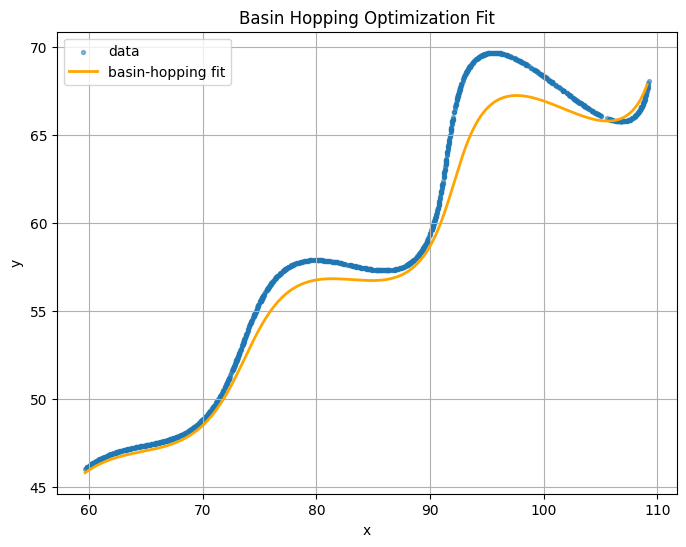

In [12]:

# 8️⃣ Plot data vs fitted curve
t = np.linspace(6, 60, N)
x_fit, y_fit = parametric_curve(t, theta_deg, M, X)

plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, s=8, alpha=0.5, label='data')
plt.plot(x_fit, y_fit, lw=2, color='orange', label='basin-hopping fit')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Basin Hopping Optimization Fit")
plt.grid(True)
plt.show()


In [13]:

# 9️⃣ Generate LaTeX-like final equation
eqn_str = (
    f"\\left( t*\\cos({theta_deg:.6f}) - e^{{{M:.8f}\\left|t\\right|}}\\cdot\\sin(0.3t)\\sin({theta_deg:.6f}) + {X:.6f}, "
    f"42 + t*\\sin({theta_deg:.6f}) + e^{{{M:.8f}\\left|t\\right|}}\\cdot\\sin(0.3t)\\cos({theta_deg:.6f}) \\right)"
)
print("\nLaTeX/Desmos-ready expression:\n", eqn_str)



LaTeX/Desmos-ready expression:
 \left( t*\cos(28.118423) - e^{0.02138896\left|t\right|}\cdot\sin(0.3t)\sin(28.118423) + 54.899130, 42 + t*\sin(28.118423) + e^{0.02138896\left|t\right|}\cdot\sin(0.3t)\cos(28.118423) \right)


🧠 Advanced Basin Hopping Pipeline (Multi-Optimizer Search)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize, basinhopping

# ===========================================
# 1️⃣ Load data
# ===========================================
df = pd.read_csv(r"C:\work\\Flam_R-D\\xy_data.csv")
x_data = df['x'].values
y_data = df['y'].values
N = len(x_data)


In [16]:

# ===========================================
# 2️⃣ Model definition
# ===========================================
def parametric_curve(t, theta, M, X):
    theta_rad = np.deg2rad(theta)
    x_model = t * np.cos(theta_rad) - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta_rad) + X
    y_model = 42 + t * np.sin(theta_rad) + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta_rad)
    return x_model, y_model


In [17]:

# ===========================================
# 3️⃣ L1 distance loss function
# ===========================================
def l1_loss(params):
    theta, M, X = params
    t = np.linspace(6, 60, N)
    x_pred, y_pred = parametric_curve(t, theta, M, X)
    loss = np.mean(np.abs(x_pred - x_data) + np.abs(y_pred - y_data))
    return loss


In [18]:

# ===========================================
# 4️⃣ Custom random displacement step for Basin Hopping
# ===========================================
class RandomDisplacement:
    def __init__(self, stepsize=1.0):
        self.stepsize = stepsize
    def __call__(self, x):
        s = self.stepsize
        return x + np.random.uniform(-s, s, x.shape)


In [19]:

# ===========================================
# 5️⃣ Optimization configuration
# ===========================================
optimizers = ["L-BFGS-B", "Powell", "Nelder-Mead"]
bounds = [(0, 50), (-0.05, 0.05), (0, 100)]
initial_guess = [25, 0.02, 50]
results = []


In [20]:

# ===========================================
# 6️⃣ Run Basin Hopping for multiple optimizers
# ===========================================
for opt in optimizers:
    print(f"\n=== Running Basin Hopping with {opt} ===")
    minimizer_kwargs = {"method": opt, "bounds": bounds}
    
    res = basinhopping(
        l1_loss,
        x0=initial_guess,
        minimizer_kwargs=minimizer_kwargs,
        niter=400,                 # increase to 800–1000 for extreme accuracy
        T=0.5,
        stepsize=1.2,
        take_step=RandomDisplacement(stepsize=1.5),
        disp=True
    )
    
    results.append((opt, res.fun, res.x))



=== Running Basin Hopping with L-BFGS-B ===
basinhopping step 0: f 25.2434
basinhopping step 1: f 25.2444 trial_f 25.2444 accepted 1  lowest_f 25.2434
basinhopping step 2: f 25.2475 trial_f 25.2475 accepted 1  lowest_f 25.2434
basinhopping step 3: f 25.2434 trial_f 25.2434 accepted 1  lowest_f 25.2434
basinhopping step 4: f 25.2441 trial_f 25.2441 accepted 1  lowest_f 25.2434
basinhopping step 5: f 25.2436 trial_f 25.2436 accepted 1  lowest_f 25.2434
basinhopping step 6: f 25.2448 trial_f 25.2448 accepted 1  lowest_f 25.2434
basinhopping step 7: f 25.2461 trial_f 25.2461 accepted 1  lowest_f 25.2434
basinhopping step 8: f 25.2443 trial_f 25.2443 accepted 1  lowest_f 25.2434
basinhopping step 9: f 25.2435 trial_f 25.2435 accepted 1  lowest_f 25.2434
basinhopping step 10: f 25.2439 trial_f 25.2439 accepted 1  lowest_f 25.2434
basinhopping step 11: f 25.2434 trial_f 25.2434 accepted 1  lowest_f 25.2434
basinhopping step 12: f 25.2434 trial_f 25.2434 accepted 1  lowest_f 25.2434
basinhopp

c:\work\Flam_R-D\flam_env\lib\site-packages\scipy\optimize\_basinhopping.py:294: OptimizeWarning: Initial guess is not within the specified bounds
  return self.minimizer(self.func, x0, **self.kwargs)


basinhopping step 8: f 25.2434 trial_f 25.2434 accepted 1  lowest_f 25.2434
basinhopping step 9: f 25.2434 trial_f 25.2434 accepted 1  lowest_f 25.2434
found new global minimum on step 9 with function value 25.2434
basinhopping step 10: f 25.2434 trial_f 25.2434 accepted 1  lowest_f 25.2434
basinhopping step 11: f 25.2434 trial_f 25.2434 accepted 1  lowest_f 25.2434
basinhopping step 12: f 25.2434 trial_f 25.2434 accepted 1  lowest_f 25.2434
basinhopping step 13: f 25.2434 trial_f 25.2434 accepted 1  lowest_f 25.2434
found new global minimum on step 13 with function value 25.2434
basinhopping step 14: f 25.2434 trial_f 25.2434 accepted 1  lowest_f 25.2434
basinhopping step 15: f 25.2434 trial_f 25.2434 accepted 1  lowest_f 25.2434
basinhopping step 16: f 25.2434 trial_f 25.2434 accepted 1  lowest_f 25.2434
basinhopping step 17: f 25.2434 trial_f 25.2434 accepted 1  lowest_f 25.2434
basinhopping step 18: f 25.2434 trial_f 25.2434 accepted 1  lowest_f 25.2434
basinhopping step 19: f 25.2

In [21]:

# ===========================================
# 7️⃣ Select best result
# ===========================================
best_result = min(results, key=lambda x: x[1])
best_opt, best_loss, best_params = best_result
theta_deg, M, X = best_params

print("\n==================== SUMMARY ====================")
for opt, loss, params in results:
    print(f"{opt:15s} | Loss: {loss:12.8f} | Params: {params}")
print("==================================================")

print(f"\n✅ Best Optimizer: {best_opt}")
print(f"θ = {theta_deg:.6f}°, M = {M:.8f}, X = {X:.6f}")
print(f"Minimum L1 Distance: {best_loss:.8f}")



==================== SUMMARY ====================
L-BFGS-B        | Loss:  25.24339589 | Params: [2.81184233e+01 2.13889603e-02 5.49008525e+01]
Powell          | Loss:  25.24339596 | Params: [2.81184863e+01 2.13885745e-02 5.49014193e+01]
Nelder-Mead     | Loss:  25.24339589 | Params: [2.81184233e+01 2.13889568e-02 5.49012598e+01]

✅ Best Optimizer: Nelder-Mead
θ = 28.118423°, M = 0.02138896, X = 54.901260
Minimum L1 Distance: 25.24339589


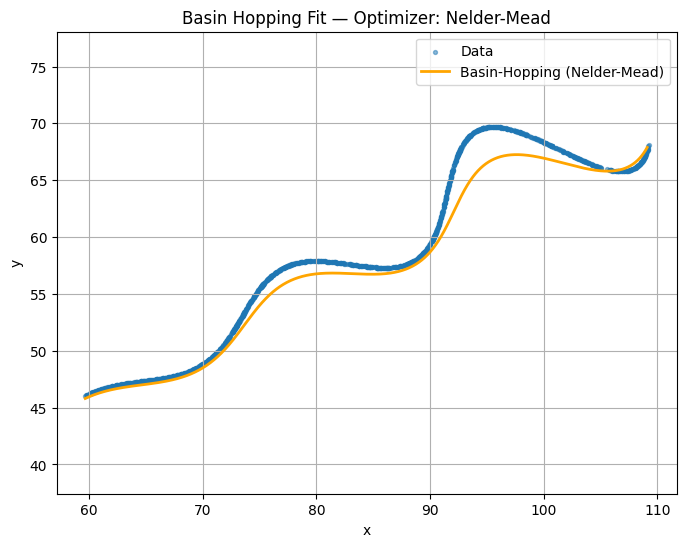

In [22]:

# ===========================================
# 8️⃣ Plot Data vs Fitted Curve
# ===========================================
t = np.linspace(6, 60, N)
x_fit, y_fit = parametric_curve(t, theta_deg, M, X)

plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, s=8, alpha=0.5, label="Data")
plt.plot(x_fit, y_fit, lw=2, color="orange", label=f"Basin-Hopping ({best_opt})")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Basin Hopping Fit — Optimizer: {best_opt}")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [23]:

# ===========================================
# 9️⃣ LaTeX/Desmos Equation Output
# ===========================================
eqn_str = (
    f"\\left( t*\\cos({theta_deg:.6f}) - e^{{{M:.8f}\\left|t\\right|}}\\cdot\\sin(0.3t)\\sin({theta_deg:.6f}) + {X:.6f}, "
    f"42 + t*\\sin({theta_deg:.6f}) + e^{{{M:.8f}\\left|t\\right|}}\\cdot\\sin(0.3t)\\cos({theta_deg:.6f}) \\right)"
)
print("\nLaTeX/Desmos-ready expression:\n", eqn_str)



LaTeX/Desmos-ready expression:
 \left( t*\cos(28.118423) - e^{0.02138896\left|t\right|}\cdot\sin(0.3t)\sin(28.118423) + 54.901260, 42 + t*\sin(28.118423) + e^{0.02138896\left|t\right|}\cdot\sin(0.3t)\cos(28.118423) \right)
